In [ ]:
# 2023-05
# Dragon fractal "puzzle piece" design
# for laser cutter

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
def doublepath(path):
    return path + [1] + [-x for x in reversed(path)]

In [72]:
path = []
for _ in range(4):
    path = doublepath(path)
    print(path)

[1]
[1, 1, -1]
[1, 1, -1, 1, 1, -1, -1]
[1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1]


In [43]:
grid = np.zeros([20, 20])

pos = np.array([10.5, 10.5])

bearing = 0

def rot90(vec):
    return np.array([-vec[1], vec[0]])

def fwd(pos, bearing, grid):
    vecs = [[1, 0], [0, 1], [-1, 0], [0, -1]] # easier than arithmetic
    pos += np.array(vecs[bearing % 4])
    grid[tuple(pos)] += 1

grid[tuple(pos)] = 1
fwd(pos, bearing, grid)
for rot in path:
    bearing += rot
    fwd(pos, bearing, grid)

In [62]:
grid = np.zeros([20, 20])

# doubled
pos = np.array([21, 21])

bearing = 0

def rot90(vec):
    return np.array([-vec[1], vec[0]])

def fwd(pos, bearing, grid):
    vec = np.array([2, 0])
    for _ in range(bearing % 4):
        vec = rot90(vec)
    mid = pos + vec // 2
    side = rot90(vec) // 2
    grid[tuple((mid + side)//2)] += 1
    grid[tuple((mid - side)//2)] += 1
    pos += vec

fwd(pos, bearing, grid)
for rot in path:
    bearing += rot
    fwd(pos, bearing, grid)

In [63]:
print(min([i for i in range(grid.shape[0]) if np.sum(grid[i, :])>0]))
print(max([i for i in range(grid.shape[0]) if np.sum(grid[i, :])>0]))
print(min([i for i in range(grid.shape[1]) if np.sum(grid[:, i])>0]))
print(max([i for i in range(grid.shape[1]) if np.sum(grid[:, i])>0]))

5
12
5
13


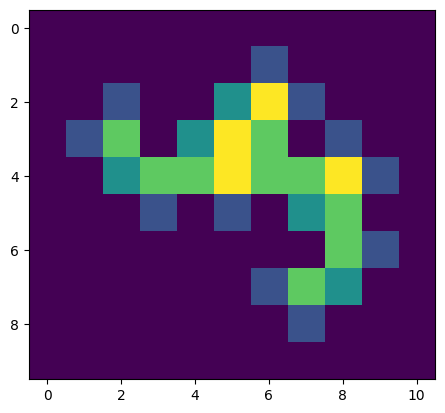

In [65]:
plt.imshow(grid[5-1:12+2, 5-1:13+2])

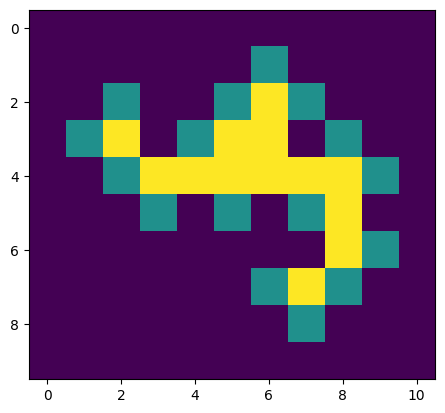

In [67]:
plt.imshow((grid[5-1:12+2, 5-1:13+2]-1) // 2)

In [ ]:
# COOL SHIT STARTS HERE

In [271]:
path = []
size = 6
for _ in range(size):
    path = doublepath(path)
    #print(path)

In [272]:
grid = np.zeros([2**(size//2+3), 2**(size//2+3)])

# doubled
pos = np.array([2**(size//2+3)+1, 2**(size//2+3)+1])
print(pos)
bearing = 0

def rot90(vec):
    return np.array([-vec[1], vec[0]])

def fwd(pos, bearing, grid):
    vec = np.array([2, 2])
    for _ in range(bearing % 4):
        vec = rot90(vec)
    mid = pos + vec // 2
    grid[tuple(mid//2)] += 1
    pos += vec

fwd(pos, bearing, grid)
for rot in path:
    bearing += rot
    fwd(pos, bearing, grid)

[65 65]


In [273]:
minx = (min([i for i in range(grid.shape[0]) if np.sum(grid[i, :])>0]))
maxx = (max([i for i in range(grid.shape[0]) if np.sum(grid[i, :])>0]))
miny = (min([i for i in range(grid.shape[1]) if np.sum(grid[:, i])>0]))
maxy = (max([i for i in range(grid.shape[1]) if np.sum(grid[:, i])>0]))

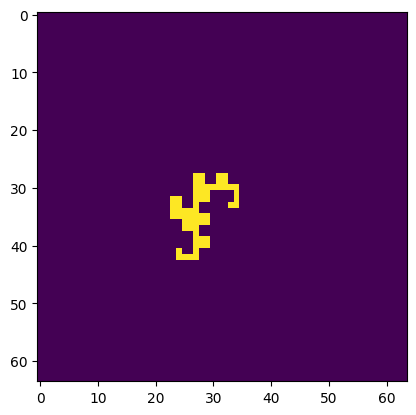

In [274]:
plt.imshow(grid)

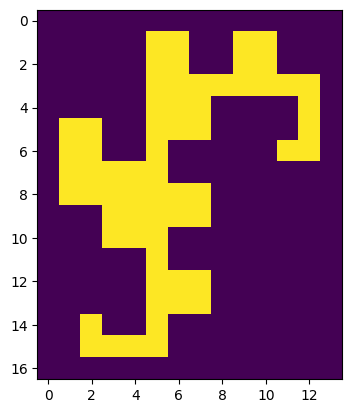

In [275]:
plt.imshow(grid[minx-1:maxx+2, miny-1:maxy+2])

In [276]:
linestr = ''

for x in range(minx-1, maxx+2):
    for y in range(miny-1, maxy+2):
        if grid[x, y] != grid[x+1, y]:
            linestr += f'<line stroke="black" x1="{x+.5}" y1="{y-.5}" x2="{x+.5}" y2="{y+.5}" />\n'
        if grid[x, y] != grid[x, y+1]:
            linestr += f'<line stroke="black" x1="{x-.5}" y1="{y+.5}" x2="{x+.5}" y2="{y+.5}" />\n'    

In [277]:
linesvg = f"""\
<svg width="100" height="100" viewBox="{minx-1} {miny-1} {maxx-minx+2} {maxy-miny+2}">
{linestr}</svg>"""

In [120]:
 viewbox="{minx-1} {miny-1} {maxx-minx+2} {maxy-miny+2}"

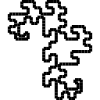

In [133]:
display(SVG(data=linesvg))

In [215]:
from collections import defaultdict

In [216]:
?defaultdict

In [278]:
edict = defaultdict(lambda: [])

for x in range(minx-1, maxx+2):
    for y in range(miny-1, maxy+2):
        if grid[x, y] != grid[x+1, y]:
            p1 = (x+.5, y-.5)
            p2 = (x+.5, y+.5)
            edict[p1].append(p2)
            edict[p2].append(p1)
        if grid[x, y] != grid[x, y+1]:
            p1 = (x-.5, y+.5)
            p2 = (x+.5, y+.5)
            edict[p1].append(p2)
            edict[p2].append(p1)

In [279]:
points = []
start = list(edict.keys())[0]

last = None
now = start
points.append(now)

nex = [pt for pt in edict[now] if pt != last][0]
last, now = now, nex
points.append(now)

while now != start:
    nex = [pt for pt in edict[now] if pt != last][0]
    last, now = now, nex
    points.append(now)

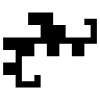

In [280]:
edictsvg = f"""\
<svg width="100" height="100" viewBox="{minx-1} {miny-1} {maxx-minx+2} {maxy-miny+2}">
<polyline points="{' '.join([f'{pt[0]},{pt[1]}' for pt in points])}"/>
</svg>"""
display(SVG(data=edictsvg))

In [270]:
with open(f'/home/adam/Dropbox/personal/projects/ipy/lasers/dragon{size}.svg', 'w') as f:
    f.write(edictsvg)

In [77]:
turtle_path = 'FFRFRFLFFLFFRFFRFFLFFRFFFFRFFRFRFLFFLFFFFFF'

turt = np.array([0, 0])
head = np.array([1, 0])
points = [turt]

for step in turtle_path:
    if step == 'F':
        turt = turt + head
        points.append(turt)
    elif step == 'R':
        head = rot90(head)
    elif step == 'L':
        for _ in range(3):
            head = rot90(head) # like in Zoolander

In [78]:
points

[array([0, 0]),
 array([1, 0]),
 array([2, 0]),
 array([2, 1]),
 array([1, 1]),
 array([1, 2]),
 array([1, 3]),
 array([2, 3]),
 array([3, 3]),
 array([3, 4]),
 array([3, 5]),
 array([2, 5]),
 array([1, 5]),
 array([1, 6]),
 array([1, 7]),
 array([0, 7]),
 array([-1,  7]),
 array([-2,  7]),
 array([-3,  7]),
 array([-3,  6]),
 array([-3,  5]),
 array([-2,  5]),
 array([-2,  6]),
 array([-1,  6]),
 array([0, 6]),
 array([0, 5]),
 array([0, 4]),
 array([0, 3]),
 array([0, 2]),
 array([0, 1]),
 array([0, 0])]

In [40]:
from IPython.display import SVG, display

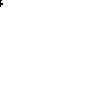

In [105]:
mysvg = f"""\
<svg width="100" height="100" viewbox="-4 -1 8 9">
<polyline points="{' '.join([f'{pt[0]},{pt[1]}' for pt in points])}"/>
</svg>"""
display(SVG(data=mysvg))

In [85]:
?SVG

In [88]:
mysvg

'<svg width="100" height="100" viewbox="-4 -1 4 8">\n<polyline points="0,0 1,0 2,0 2,1 1,1 1,2 1,3 2,3 3,3 3,4 3,5 2,5 1,5 1,6 1,7 0,7 -1,7 -2,7 -3,7 -3,6 -3,5 -2,5 -2,6 -1,6 0,6 0,5 0,4 0,3 0,2 0,1 0,0"/>\n</svg>'

In [10]:
pos = np.array([0, 2, 3])

In [16]:
pos[[0, 2]] = [3, 5]

In [17]:
pos

array([3, 2, 5])